## <font color='purple'>SML Assignment 2: Multiple Regression </font>
### Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 
 

<font color='teal'>BIKE DATASET</font>

### <font color='teal'>Step 1 : Importing Libraries </font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### <font color='teal'> Step 2: Upload Dataset </font>

In [4]:
df=pd.read_csv("E:\\4TH SEM NOTES\\datasets\\day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### <font color='teal'>Step 3: Data Description </font>

In [5]:
# Dropping the unnecessary values 
df = df.drop(columns=["instant","season","yr","mnth","temp","holiday","casual"])
df

,dteday,weekday,workingday,weathersit,atemp,hum,windspeed,registered,cnt
0,01-01-2018,6,0,2,18.18125,80.5833,10.749882,654,985
1,02-01-2018,0,0,2,17.68695,69.6087,16.652113,670,801
2,03-01-2018,1,1,1,9.47025,43.7273,16.636703,1229,1349
3,04-01-2018,2,1,1,10.60610,59.0435,10.739832,1454,1562
4,05-01-2018,3,1,1,11.46350,43.6957,12.522300,1518,1600
...,...,...,...,...,...,...,...,...,...
725,27-12-2019,4,1,2,11.33210,65.2917,23.458911,1867,2114
726,28-12-2019,5,1,2,12.75230,59.0000,10.416557,2451,3095
727,29-12-2019,6,0,2,12.12000,75.2917,8.333661,1182,1341
728,30-12-2019,0,0,1,11.58500,48.3333,23.500518,1432,1796


In [6]:
#Renaming the columns 
df = df.rename(columns={'dteday': 'date', 'weathersit': 'weather','atemp': 'temperature', 'hum': 'humidity', 'cnt': 'count'})
df

,date,weekday,workingday,weather,temperature,humidity,windspeed,registered,count
0,01-01-2018,6,0,2,18.18125,80.5833,10.749882,654,985
1,02-01-2018,0,0,2,17.68695,69.6087,16.652113,670,801
2,03-01-2018,1,1,1,9.47025,43.7273,16.636703,1229,1349
3,04-01-2018,2,1,1,10.60610,59.0435,10.739832,1454,1562
4,05-01-2018,3,1,1,11.46350,43.6957,12.522300,1518,1600
...,...,...,...,...,...,...,...,...,...
725,27-12-2019,4,1,2,11.33210,65.2917,23.458911,1867,2114
726,28-12-2019,5,1,2,12.75230,59.0000,10.416557,2451,3095
727,29-12-2019,6,0,2,12.12000,75.2917,8.333661,1182,1341
728,30-12-2019,0,0,1,11.58500,48.3333,23.500518,1432,1796


In [7]:
#drived column: "date" extract date and rename it to date 
df['date'] = df['date'].apply(lambda x: int(x.split('-')[0]))
df

,date,weekday,workingday,weather,temperature,humidity,windspeed,registered,count
0,1,6,0,2,18.18125,80.5833,10.749882,654,985
1,2,0,0,2,17.68695,69.6087,16.652113,670,801
2,3,1,1,1,9.47025,43.7273,16.636703,1229,1349
3,4,2,1,1,10.60610,59.0435,10.739832,1454,1562
4,5,3,1,1,11.46350,43.6957,12.522300,1518,1600
...,...,...,...,...,...,...,...,...,...
725,27,4,1,2,11.33210,65.2917,23.458911,1867,2114
726,28,5,1,2,12.75230,59.0000,10.416557,2451,3095
727,29,6,0,2,12.12000,75.2917,8.333661,1182,1341
728,30,0,0,1,11.58500,48.3333,23.500518,1432,1796


In [8]:
# Checking head of the dataset
df.head()

,date,weekday,workingday,weather,temperature,humidity,windspeed,registered,count
0,1,6,0,2,18.18125,80.5833,10.749882,654,985
1,2,0,0,2,17.68695,69.6087,16.652113,670,801
2,3,1,1,1,9.47025,43.7273,16.636703,1229,1349
3,4,2,1,1,10.60610,59.0435,10.739832,1454,1562
4,5,3,1,1,11.46350,43.6957,12.522300,1518,1600


In [9]:
# Checking the shape of df
df.shape

(730, 9)

In [10]:
# Checking the descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         730 non-null    int64  
 1   weekday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   weather      730 non-null    int64  
 4   temperature  730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   registered   730 non-null    int64  
 8   count        730 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.5 KB


In [11]:
#checking the data description
df.describe()

,date,weekday,workingday,weather,temperature,humidity,windspeed,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,3658.757534,4508.006849
std,8.802278,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,20.000000,22.000000
25%,8.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,2502.250000,3169.750000
50%,16.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,3664.500000,4548.500000
75%,23.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,4783.250000,5966.000000
max,31.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,6946.000000,8714.000000


### <font color='teal'>Step 4 : Data Cleaning </font>

In [12]:
#Check for null values
df.isnull().sum()
#there are no null/missing values 

date           0
weekday        0
workingday     0
weather        0
temperature    0
humidity       0
windspeed      0
registered     0
count          0
dtype: int64

In [13]:
df.dtypes

date             int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
registered       int64
count            int64
dtype: object

### <font color='teal'>Step 5: Data Visualisation , EDA </font> 

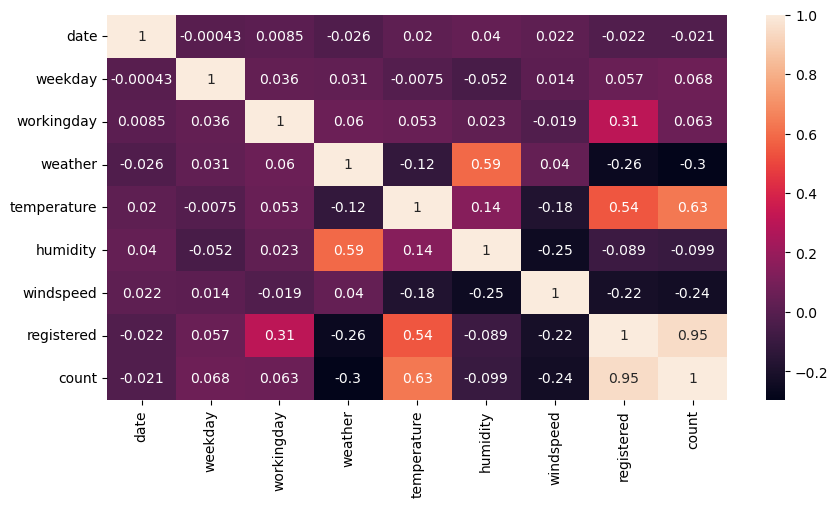

In [14]:
#plotting heatmap
import seaborn as sns
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor, annot = True)
plt.show()

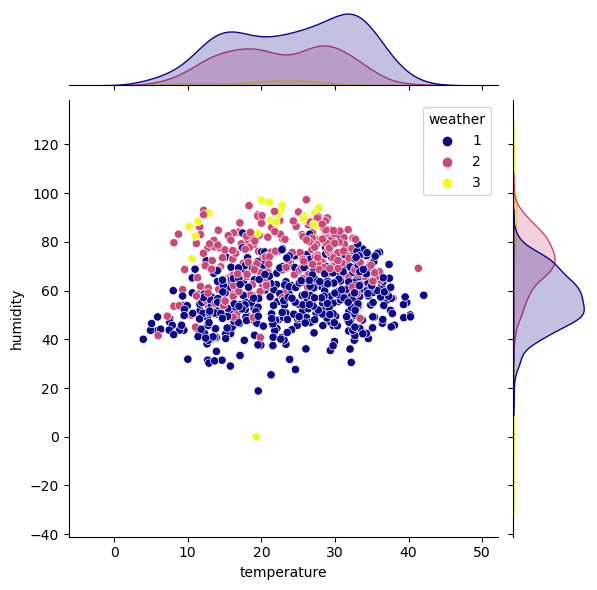

In [15]:
sns.jointplot(data=df, x="temperature", y="humidity", hue="weather", palette = "plasma")


C:\Users\kaust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


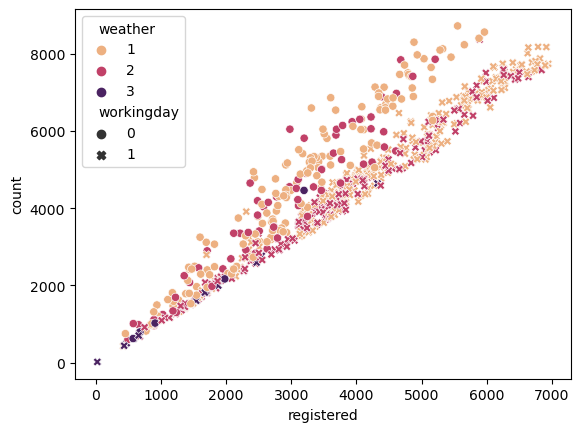

In [16]:
sns.scatterplot(df["registered"], df["count"], hue=df["weather"], style=df['workingday'],palette = "flare")
plt.show()


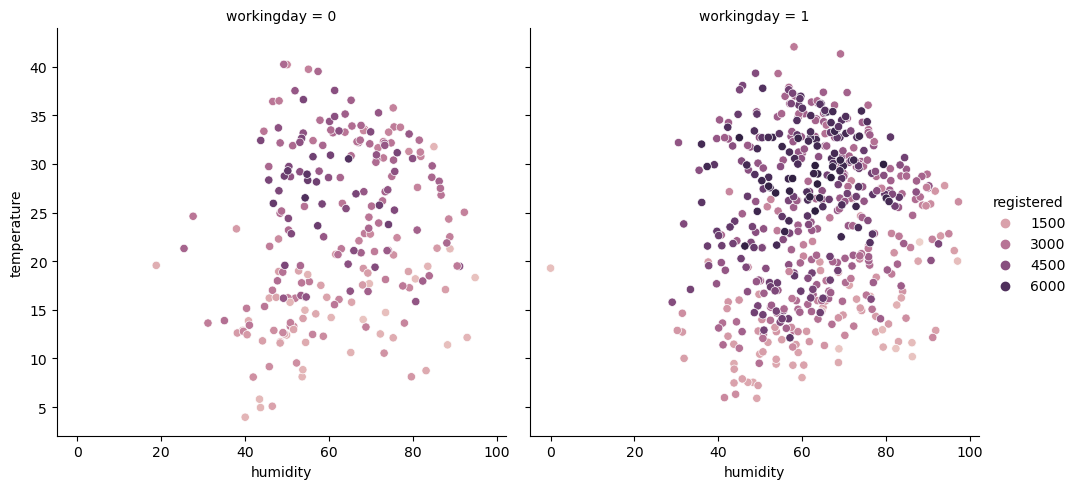

In [17]:
sns.relplot(
data=df, x="humidity", y="temperature",
col="workingday", hue="registered",
)


In [18]:
df.columns

Index(['date', 'weekday', 'workingday', 'weather', 'temperature', 'humidity',
       'windspeed', 'registered', 'count'],
      dtype='object')

### <font color='teal'>Step 7: Splitting the data </font>

In [19]:
#splitting df two parts
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# x is independent feature 
x

,date,weekday,workingday,weather,temperature,humidity,windspeed,registered
0,1,6,0,2,18.18125,80.5833,10.749882,654
1,2,0,0,2,17.68695,69.6087,16.652113,670
2,3,1,1,1,9.47025,43.7273,16.636703,1229
3,4,2,1,1,10.60610,59.0435,10.739832,1454
4,5,3,1,1,11.46350,43.6957,12.522300,1518
...,...,...,...,...,...,...,...,...
725,27,4,1,2,11.33210,65.2917,23.458911,1867
726,28,5,1,2,12.75230,59.0000,10.416557,2451
727,29,6,0,2,12.12000,75.2917,8.333661,1182
728,30,0,0,1,11.58500,48.3333,23.500518,1432


In [21]:
# y is dependent feature 
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: count, Length: 730, dtype: int64

### <font color='teal'>Step 8 : Split x and y into training and test data set  </font>

In [40]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state=100)

In [41]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 8)
(146, 8)
(584,)
(146,)


### <font color='teal'>Step 9: Scaling the data  </font>

In [24]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()  #StandardScaler: transforming data into particular size
#x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [25]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 8)
(146, 8)
(584,)
(146,)


### <font color='teal'>Step 10: Import Regression Model  </font>

In [42]:
from sklearn.linear_model import LinearRegression
#create the model instance
mlr = LinearRegression()
#fit the model on the training data
mlr.fit(x_train, y_train)

LinearRegression()

In [43]:
#from sklearn.linear_model import LinearRegression
#mlr = LinearRegression()
#mlr.fit(x_train, y_train)


### <font color='teal'>Step 11: Calculating slope and intercept for each factor  </font>

In [44]:
print("Intercept: ",mlr.intercept_)
print("Coefficients: ")
list(zip(x,mlr.coef_))

Intercept:  399.2493345943112
Coefficients: 


[('date', -0.17289145108768667),
 ('weekday', 20.616605489923614),
 ('workingday', -920.8550053650646),
 ('weather', -39.989167684980735),
 ('temperature', 33.87105074490125),
 ('humidity', -3.2722617474421694),
 ('windspeed', -5.8337426767534),
 ('registered', 1.1490901063400474)]

### <font color='teal'>Step 12: Predicting Values </font>

In [45]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [4647.51486257 6614.56856732 2686.58921017 4918.36427662 5259.97723651
 3916.94970338 4506.84724372 4863.41283814 5233.09511306 4723.60850925
 6410.23073624 6585.48479555 3984.71328954 5989.36306263 2605.87846821
 6868.85691945 4992.65906215 1255.83194596 5601.6341681  5246.62460802
 7914.05696892 2488.51627088 5479.23340781 1775.55948299 4110.90226676
 4618.72303832 7767.25049032 4971.28457242 7260.00773743 4239.05575001
 7012.50714339 7513.78413535 4943.81564732 4222.16782014 1515.93501501
 3893.05759576 4102.09409106 6023.43151465 1647.10548001 4613.63608286
 4690.32286544 2830.89406854 5879.58170558 4266.79242329 5093.97621408
 6856.1270082  1719.76355855 4258.18463976 5477.69865202 2491.62003042
 7304.39791002 4975.38086012 5237.2568807  6869.79994893 1911.70783717
 6140.7411446  4361.42179124 4661.7818564  2726.0913937  5743.51656994
 4476.87952047 4185.71202434 1528.14850136 4811.13113763 5979.01762583
 4625.55550632 7906.25673735 5700.31606238 4406.7212

In [46]:
mlr_diff = pd.DataFrame({'Actual value': y_test,'Predicted value': y_pred_mlr})
mlr_diff.head(10)

,Actual value,Predicted value
184,6043,4647.514863
535,6211,6614.568567
299,2659,2686.589210
221,4780,4918.364277
152,4968,5259.977237
404,3830,3916.949703
198,4458,4506.847244
171,4835,4863.412838
512,6043,5233.095113
200,4332,4723.608509


### <font color='teal'> Step 13: Calculating R2E, MAE, MSE, RMSE </font>

In [47]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr) 
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)) 
print('R_squared: {:.2f}'.format(mlr.score(x,y)*100)) 
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R_squared: 96.31
Mean Absolute Error: 297.3399887666348
Mean Square Error: 176361.43626864647
Root Mean Square Error: 419.9540882866203


### <font color='teal'>Step 14: Plotting values using a scatter plot </font>

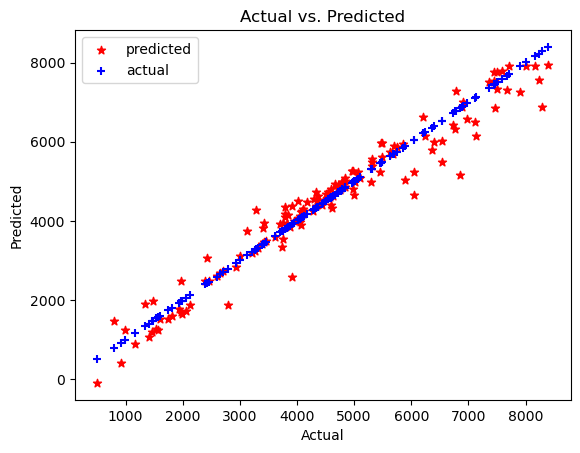

In [48]:
plt.scatter(y_test, y_pred_mlr, marker='*', color='red', label='predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

## THANK YOU 